# Чаевые в ресторане

## Это задание основано на туториале Seaborn. Используйте здесь эту библиотеку.  


Документация - https://seaborn.pydata.org/index.html  
Памятка по выбору графика в seaborn - https://martinnormark.com/a-simple-cheat-sheet-for-seaborn-data-visualization-2/


### Шаг 1. Импортируем библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


### Шаг 2. Прочитаем датасет в переменную `tips`

In [2]:
# path = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
path = '../learning/datasets/tips.csv'

In [3]:
tips = pd.read_csv('/Users/uladzislauyermakou/Downloads/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Шаг 3. Создай столбец `time_order`
### Заполни его случайной датой в промежутке от 2023-01-01 до 2023-01-31

In [4]:
tips['time_order'] = np.random.choice(pd.date_range('2023-01-01', '2023-01-31'), 244)
tips

,total_bill,tip,sex,smoker,day,time,size,time_order
0,16.99,1.01,Female,No,Sun,Dinner,2,2023-01-11
1,10.34,1.66,Male,No,Sun,Dinner,3,2023-01-30
2,21.01,3.50,Male,No,Sun,Dinner,3,2023-01-15
3,23.68,3.31,Male,No,Sun,Dinner,2,2023-01-24
4,24.59,3.61,Female,No,Sun,Dinner,4,2023-01-04
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2023-01-27
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2023-01-13
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2023-01-15
242,17.82,1.75,Male,No,Sat,Dinner,2,2023-01-24


### Шаг 4. Построй график показывающий динамику чаевых во времени

Text(0.5, 1.0, 'Динамика изменения чаевых в январе')

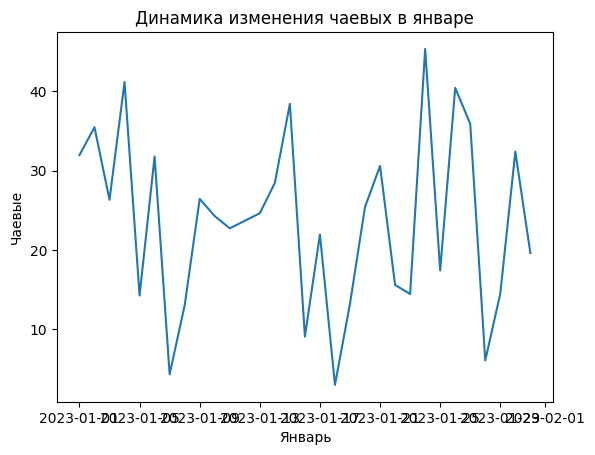

In [5]:
tips1 = tips.groupby('time_order', as_index = False).agg({'tip':'sum'}).sort_values('time_order', ascending = True)
plt.plot(tips1['time_order'],tips1['tip'])
plt.xlabel('Январь')
plt.ylabel('Чаевые')
plt.title('Динамика изменения чаевых в январе')

Сделай аналогичный график используя многофункциональный метод [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html)

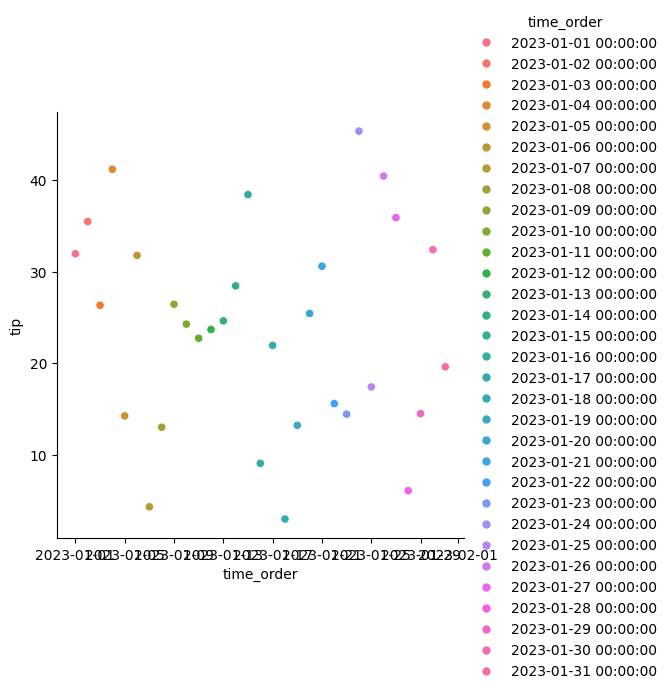

In [6]:
sns.relplot(data=tips1, x="time_order", y="tip", hue = 'time_order')

### Шаг 5. Нарисуйте гистограмму `total_bill`

Text(0.5, 1.0, 'Стоимость заказа за январь')

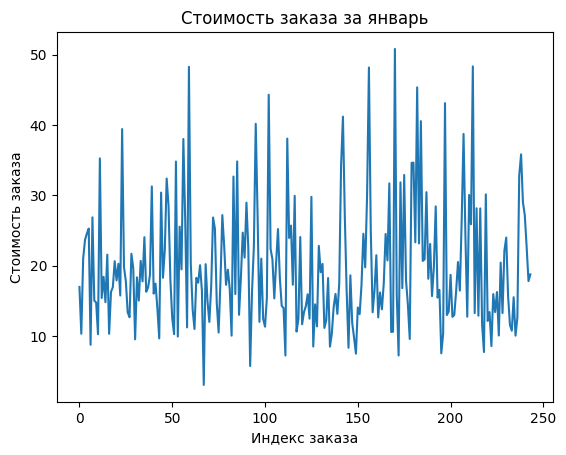

In [7]:
plt.plot(tips['total_bill'])
plt.xlabel('Индекс заказа')
plt.ylabel('Стоимость заказа')
plt.title('Стоимость заказа за январь')

Сделай аналогичный график используя многофункциональный метод [displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)  
Поиграйся с другими формами отображения меняя параметр параметр `kind`  

In [8]:
sns.displot(data = tips1, x = 'total_bill', kde = True)

ValueError: Could not interpret value `total_bill` for `x`. An entry with this name does not appear in `data`.

### Шаг 6. Нарисуйте scatterplot, показывающий связь между `total_bill` and `tip`

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.xlabel['Стоимость заказа']
plt.ylabel['Чаевые']
plt.title['Взаимосзязь стоимости заказа и чаевых']

: 

Сделай аналогичный график используя многофункциональный метод [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html)

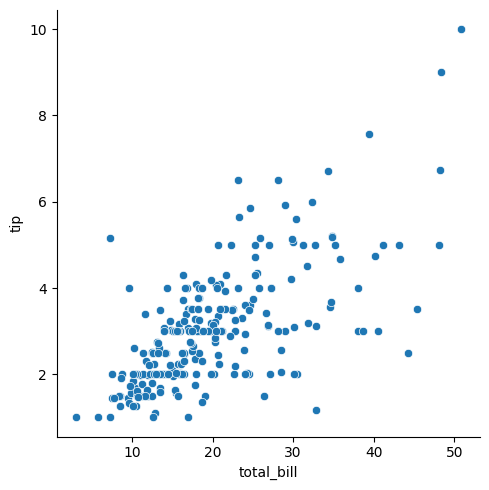

In [ ]:
sns.relplot(data = tips, x = 'total_bill', y = 'tip')

### Шаг 7. Нарисуйте 1 график, связывающий `total_bill`, `tip`, и `size`
#### Подсказка: это одна функция

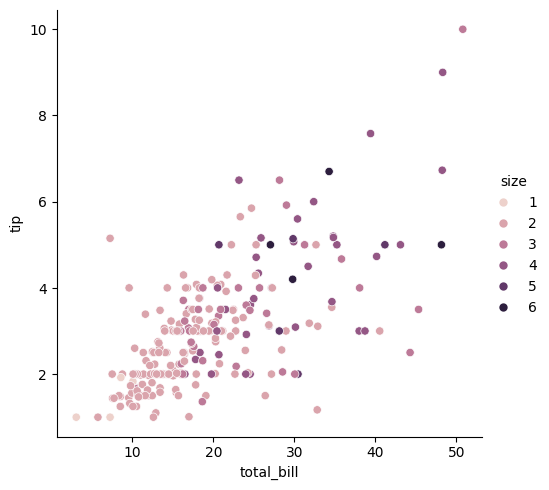

In [ ]:
sns.relplot(data = tips, x = 'total_bill', y = 'tip',hue = 'size')

### Шаг 8. Покажите связь между днем недели и размером счета

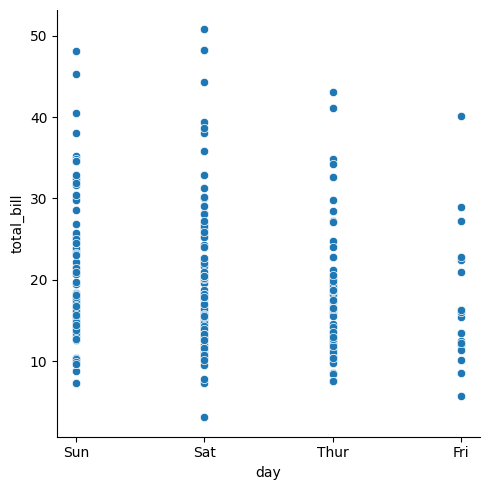

In [ ]:
sns.relplot(data = tips, x = 'day', y = 'total_bill')

### Шаг 9. Нарисуйте `scatter plot` с днем недели по оси **Y**, чаевыми по оси **X**, и цветом по полу

<Axes: xlabel='day', ylabel='tip'>

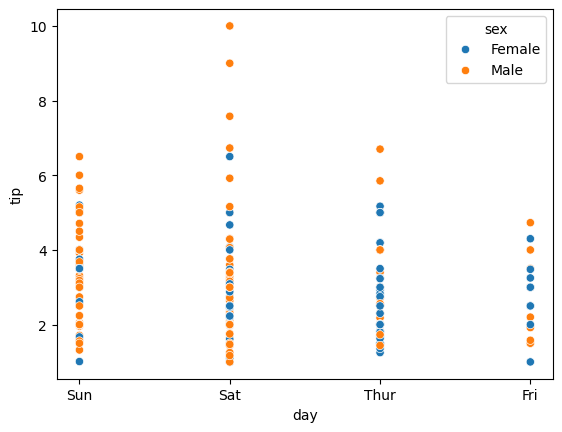

In [ ]:
sns.scatterplot(data = tips, x = 'day', y = 'tip', hue = 'sex')

### Шаг 10. Нарисуйте `box plot` c суммой всех счетов за каждый день, разбивая по `time` (Dinner/Lunch)

Как понимать boxplot? https://tidydata.ru/boxplot

<Axes: xlabel='day', ylabel='total_bill'>

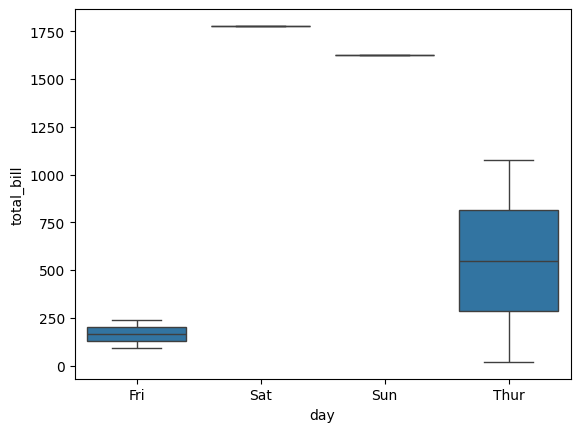

In [ ]:
total = tips.groupby(['day','time'], as_index = False).agg({'total_bill':'sum'}).sort_values('day')
sns.boxplot(data = total, x="day", y="total_bill")

Построй аналогичный график используя многофункциональный метод [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)    
Поиграйся с другими формами отображения меняя параметр параметр `kind`

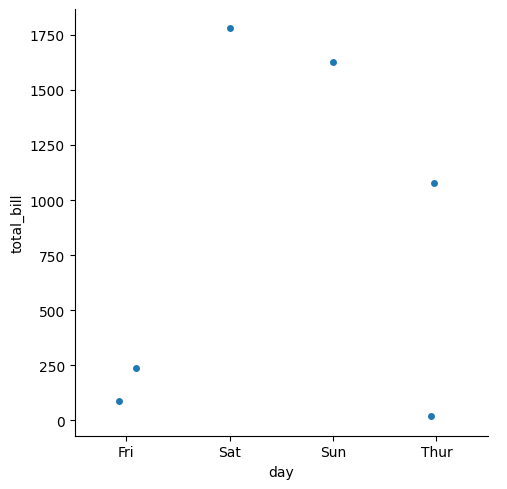

In [ ]:
sns.catplot(data=total, x="day", y="total_bill")

### Шаг 11. Нарисуйте 2 гистограммы чаевых на обед и ланч. Расположите их рядом по горизонтали.

Text(0, 0.5, 'Частота')

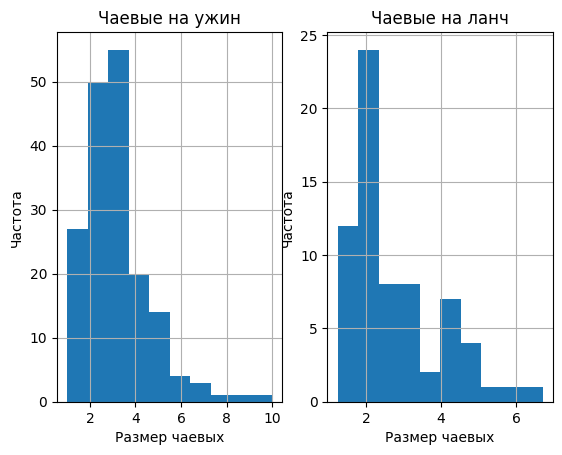

In [ ]:
fig, axes = plt.subplots(1, 2)

tips[tips['time'] == 'Dinner']['tip'].hist(ax=axes[0])
tips[tips['time'] == 'Lunch']['tip'].hist(ax=axes[1])

axes[0].set_title('Чаевые на ужин')
axes[0].set_xlabel('Размер чаевых')
axes[0].set_ylabel('Частота')

axes[1].set_title('Чаевые на ланч')
axes[1].set_xlabel('Размер чаевых')
axes[1].set_ylabel('Частота')

### Шаг 12. Нарисуйте 2 scatterplots (для мужчин и женщин), показав связь размера счета и чаевых, дополнительно разбив по курящим/некурящим. Расположите их по горизонтали.

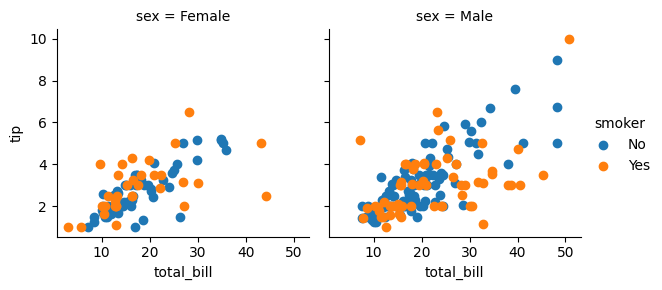

In [ ]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip")
g.add_legend()

### Шаг 13. Построй тепловую карту зависимостей численных переменных
Матрица корреляций в pandas - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html  
Добавь отображение чисел в каждой ячейке

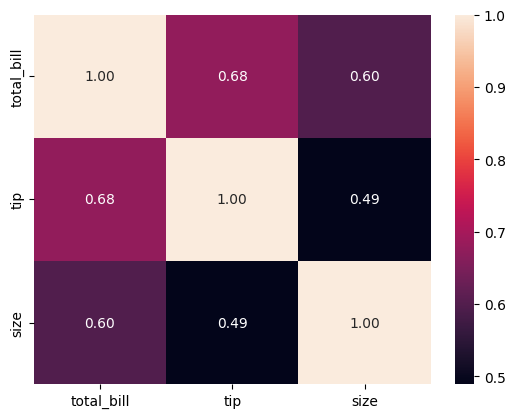

In [ ]:
numeric_cols = tips.select_dtypes(include=[np.number]).columns
df = tips[numeric_cols]
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

### БОНУС: Задайте свой вопрос и ответьте на него с помощью графика.